In [2]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

c:\Users\Faranak\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
n_input = 784
n_hidden1 = 128
n_hidden2 = 64
n_out = 10
model = nn.Sequential(nn.Linear(n_input, n_hidden1), 
                    nn.ReLU(),
                    nn.Linear(n_hidden1, n_hidden2),
                    nn.ReLU(),
                    nn.Linear(n_hidden2,n_out),
                    nn.LogSoftmax(dim=1))
optimizer = optim.SGD(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

In [5]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

Training loss : 1.8784485221671652
Training loss : 0.8411256273481638
Training loss : 0.5294570962884533
Training loss : 0.4303607895875028
Training loss : 0.3830478629196631


In [9]:
images, labels = next(iter(trainloader))

img = images[1].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)

tensor(7)

Text(0.5, 1.0, 'The model predicts the selected digit as 7')

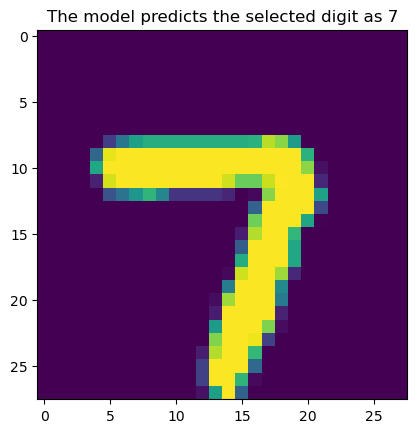

In [12]:
plt.imshow(images[1].squeeze().numpy())
plt.title(f"The model predicts the selected digit as {torch.argmax(ps)}")